In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('spotify-Eda-project')
jovian.set_colab_id('1zAH8BWNnWiE7HDsR9F1mmtB4Yu8wsfOA')

# Spotify Streaming History: Exploratory Data Analysis Project

In this project we are going to explore my `Spotify` usage. `Spotify` is one the most famous and popular music streaming platform. The dataset used here showcases my personal usage of this platform. 

Here on this dataset we can see: 
* The list of songs I played
* The list of songs's artist
* How long my usage was and more

I downloaded this dataset from the Spotify's `Privacy Setting` section, which allows anyone to download their personal usage data. With this dataset I'm trying to analyse my streaming history to gain some useful insights. 

For this EDA Project I'm going to use several tools such as `Jupyter Notebook`,`Python` and Python Libraries such as `numpy, pandas, matplotlib, seaborn, wordcloud, jovian`.

In [2]:
!pip install pandas numpy matplotlib seaborn wordcloud jovian --upgrade --q

## 0. Imports

In [3]:
%matplotlib inline
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn
from wordcloud import WordCloud # Import for Word Cloud

## 1. Downloading the Dataset

One can can download the ZIP file with a copy of most of the personal data by using the automated `Download your data` function on the `Privacy Settings` section of account page in `Spotify`.

### Instructions for downloading the dataset

> 1. Go to the `Privacy Settting` Page of your Spotify Account.
> 2. Scroll to the bottom and you'll see a section called `Download Your Data`.
> 3. You'll see a three step process with instruction to download the data.
> 4. You have to to `Request` for your data the you'll get an confirmation email from Spotify to `Confirm` the request.
> 6. After collecting the required information, Spotify will create a `Zip File` and send you an email with the `link` to download it.
> 7. If you can't find the email, you can request again from your `Privacy Settting` Page.

* For More Information: https://support.spotify.com/us/article/data-rights-and-privacy-settings/

![](https://i.imgur.com/KJKXATT.jpg)

### What kind or information you'll get ?

The download will include information about your:
> 1. Identity
> 2. Inferences
> 3. User Data
> 4. Playlists
> 5. Streaming History
> 6. Searches
> 7. List of items saved in Your Library 
> 8. Number of followers you have
> 9. Number of accounts you follow
> 10. Names of the artists you follow
> 11. Payment and subscription data. 

For more detailed information about what is included in each file of your download, use `Read Me First` pdf file that comes along with all other files in the zipped folder.

### Note:

* All the files that comes along with the information is in `JSON` format.
* You can read the files with `read_json` method and use it for analysis.
* Or you can load the data and then convert it into `csv` file.

![](https://i.imgur.com/QEZ7P3F.png)

### How to read the JSON file

In [4]:
df = pd.read_json("StreamingHistory0.json") # Load the JSON File into a dataframe
df.head() # Read first few lines of the dataframe

,endTime,artistName,trackName,msPlayed
0,2020-07-24 05:48,IU,Palette (feat. G-DRAGON),217412
1,2020-07-24 05:50,MASN,Hate Me!,154739
2,2020-07-24 05:54,Halsey,You should be sad,205473
3,2020-07-24 05:56,Lil Nas X,Panini,114893
4,2020-07-24 06:00,Stonebank,Chokehold,264001


## 2. Data Preparation and Cleaning

The `zipped folder` contains a lot of information regarding our `Account`. 
But here we'll mostly focus on the `Streaming History` only.

Steps to do:

> 1. To merge the two different Streaming History JSON Files.
> 2. To convert `endTime` column into proper Date-Time format column
> 3. To convert the `msPlayed` into proper time column `(Hours, Minutes)`
> 4. To add more columns which can be useful for further analysis

### 2.1 Import Data

We'll use `read_json` function from Pandas module to read the JSON file.

Pandas also offers a wide variety of usability. We can read several other formats as well as per our need.

* For more info (`read_josn`) : https://pandas.pydata.org/docs/reference/api/pandas.read_json.html
* For more info (`pandas`) : https://pandas.pydata.org/docs/index.html

In [5]:
df1 = pd.read_json("StreamingHistory0.json") # Read the first file
df2 = pd.read_json("StreamingHistory1.json") # Read the second file
df3 = pd.read_json("StreamingHistory2.json") # Read the Third file
df4 = pd.read_json("StreamingHistory3.json") # Read the Fourth file
df5 = pd.read_json("StreamingHistory4.json") # Read the fifth file

Here we just have five files so we made two different dataframes `manually`. 

If there are several files, one can make a `helper function` to loop all the files and load several datasets.

In [6]:
df1.head() # To read top 5 rows of the first dataframe

,endTime,artistName,trackName,msPlayed
0,2020-07-24 05:48,IU,Palette (feat. G-DRAGON),217412
1,2020-07-24 05:50,MASN,Hate Me!,154739
2,2020-07-24 05:54,Halsey,You should be sad,205473
3,2020-07-24 05:56,Lil Nas X,Panini,114893
4,2020-07-24 06:00,Stonebank,Chokehold,264001


In [7]:
df1.tail() # To read bottom 5 rows of the first dataframe

,endTime,artistName,trackName,msPlayed
9995,2021-01-17 04:19,EXO-CBX,Hey Mama!,12498
9996,2021-01-17 04:22,MAMAMOO,HIP,87492
9997,2021-01-17 04:24,Kanye West,Stronger,95217
9998,2021-01-17 04:27,Don Diablo,I Got Love (feat. Nate Dogg),14542
9999,2021-01-17 04:27,Reol,神様になった日,174034


In [8]:
df5.head() # To read top 5 rows of the second dataframe

,endTime,artistName,trackName,msPlayed
0,2021-06-30 19:07,Cheat Codes,Let Me Hold You (Turn Me On),162425
1,2021-06-30 19:08,The Cab,Bad,0
2,2021-06-30 19:08,The Weeknd,Attention,1390
3,2021-06-30 19:08,XXXTENTACION,BAD!,1000
4,2021-06-30 19:08,Paul Anka,Put Your Head On My Shoulder,89654


In [9]:
df5.tail() # To read top 5 rows of the second dataframe

,endTime,artistName,trackName,msPlayed
1056,2021-07-24 12:06,Jeremy Zucker,18,150002
1057,2021-07-24 12:10,Måneskin,Beggin',211560
1058,2021-07-24 12:15,Vampire Weekend,This Life,96851
1059,2021-07-24 12:15,Post Malone,Allergic,7054
1060,2021-07-24 12:17,Ilkay Sencan,Do It,26259


We can see that there's five different dataset available for us. Both of these contains the `Spotify Streaming` history. These datasets are continious and we can confirm by loading the top and bottom sections of both dataframes.

We can carry on with either of the datasets or we can merge it together to make one.



### 2.2 Merging the Data

We'll use `pd.concat` method from Pandas module to concatenate two datasets with similar columns.

Apart from that we can also use two other options to add two dataframe like `merge` and `join`. All these depends on how we want to add or merge.

* For more info (`pd.concat`) : https://pandas.pydata.org/docs/reference/api/pandas.concat.html
* For more info on other methods : https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [10]:
spotify_stream_df = pd.concat([df1,df2,df3,df4,df5,], ignore_index=True) # To concatenate the 5 dataframes

As we added the two different dataframes with `concat`method, we have also given an additional attribute called `ignore_index` as `True`. 

This helps to reset the index and make a new one, as both of the dataframes has their own individual indexes.

In [11]:
spotify_stream_df.to_csv("spotify_data.csv") # To save csv data

In [12]:
spotify_stream_df # To read all the dataframe at once

,endTime,artistName,trackName,msPlayed
0,2020-07-24 05:48,IU,Palette (feat. G-DRAGON),217412
1,2020-07-24 05:50,MASN,Hate Me!,154739
2,2020-07-24 05:54,Halsey,You should be sad,205473
3,2020-07-24 05:56,Lil Nas X,Panini,114893
4,2020-07-24 06:00,Stonebank,Chokehold,264001
...,...,...,...,...
41056,2021-07-24 12:06,Jeremy Zucker,18,150002
41057,2021-07-24 12:10,Måneskin,Beggin',211560
41058,2021-07-24 12:15,Vampire Weekend,This Life,96851
41059,2021-07-24 12:15,Post Malone,Allergic,7054


In [13]:
spotify_stream_df.shape # To see the shape of the merged dataframe

(41061, 4)

In [14]:
spotify_stream_df.info() # info method offers an quick option to check the data contained in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41061 entries, 0 to 41060
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     41061 non-null  object
 1   artistName  41061 non-null  object
 2   trackName   41061 non-null  object
 3   msPlayed    41061 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


We can see that there's no `null` or `NaN` data available in the dataset with the help of `info` function.

* For more info (`info`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html 

In [15]:
spotify_stream_df.nunique() # To see the unique elemetns present in each column

endTime       18741
artistName     1232
trackName      2575
msPlayed      16928
dtype: int64

With `nunique` function we can count the number of unique elements we have in the different columns of the dataset

* For more info (`nunique`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html 

In [16]:
spotify_stream_df.sample(10) # To check a sample of the data

,endTime,artistName,trackName,msPlayed
31279,2021-04-06 18:05,44phantom,all figured out,750
12800,2021-01-26 04:21,Kendrick Lamar,HUMBLE.,3756
33188,2021-04-14 16:13,Jason Ross,Open Water (feat. Heather Sommer),146576
31351,2021-04-07 06:21,Cookiee Kawaii,Vibe (If I Back It Up),15601
29153,2021-03-29 13:47,Corbin,ICE BOY,0
979,2020-08-24 18:41,Josh A,Worst Mistakes,0
18596,2021-02-09 12:34,Dua Lipa,Levitating (feat. DaBaby),203064
6946,2020-12-06 07:30,B Free,Teleport Me,103753
23983,2021-03-01 22:05,Trevor Daniel,Past Life (with Selena Gomez),9733
23577,2021-03-01 10:04,Diamond Eyes,23,32661


With `sample` function we can get a sample of the available dataset, we can provide additional `integer` attribute to get the desired number of samples.

* For more info (`sample`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html 

In [17]:
len(spotify_stream_df["artistName"].unique()) # Length of unique artist

1232

We can see that there's `1232` number of unique artist in my streaming history

In [18]:
len(spotify_stream_df["trackName"].unique()) # Length of unique tracks

2575

We can see that there's `2575` number of unique songs in my streaming history

* For more info (`unique`): https://pandas.pydata.org/docs/reference/api/pandas.unique.html

### 2.3 Cleaning and Formatting

We'll use `pd.to_datetime` method from Pandas module to convert a object column into proper date time column.

We'll also use `pd.DatetimeIndex` method from Pandas module to obtain several uniuqe information from `date time` column like `year, month, day, weekday, time, hour, day_name`.

* For more info (`pd.to_datetime`) : https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 
* For more info (`pd.DatetimeIndex`) : https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html 

In [19]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"]) # To create a additional column

Here we used the `to_datetime` module to obatin the proper date time format and then we added that into a new column called `Play-Time`.

In [20]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

Here we used the `DatetimeIndex` module to obatin the several unique information. We also added them to a new columns as per their representaion and information.

Information contained in different columns :
1. `year` has information about the year when we played that song
2. `month` has information about the month when we played that song
3. `weekday` has information about the weekday when we played that song
4. `time` has information about the time when we played that song
5. `hours` has information about the hour when we played that song
6. `day-name` has information about the day with the name when we played that song. Here we used `apply` method for pandas dataframe with `lambda` function.

We also added a new column called `count` to keep track of the count of the songs.

**Note: I did not know how to get the day name out of weekday numbers so I took help from link <a href="https://www.geeksforgeeks.org/get-day-from-date-in-pandas-python/">here</a>.** 


* For more info (`apply`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
* For more info (`lambda`) : https://www.w3schools.com/python/python_lambda.asp

In [21]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

Here we used the `to_timedelta` module to obatin the information regarding the time frame of the song played in milli-seconds.

We also converted the information given in milli-seconds into proper format and added it into another column called `Time-Played (hh-mm-ss)`.

* For more info (`to_timedelta`) : https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

In [22]:
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

Here we made two seperate functions called `hours` and `minutes` which will help us to convert the time we got in `Time-Played (hh-mm-ss)` to convert in approximate minutes and hours. 

We used the `apply` method to apply those two function along with the `round` method here to do the calculation and approximation.

* For more info (`round`) : https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.round.html

In [23]:
spotify_stream_df.head() # To check the newly formed dataset with additional columns

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2020-07-24 05:48,IU,Palette (feat. G-DRAGON),217412,2020-07-24 05:48:00,2020,7,24,4,05:48:00,5,Friday,1,0 days 00:03:37.412000,0.060,3.617
1,2020-07-24 05:50,MASN,Hate Me!,154739,2020-07-24 05:50:00,2020,7,24,4,05:50:00,5,Friday,1,0 days 00:02:34.739000,0.043,2.567
2,2020-07-24 05:54,Halsey,You should be sad,205473,2020-07-24 05:54:00,2020,7,24,4,05:54:00,5,Friday,1,0 days 00:03:25.473000,0.057,3.417
3,2020-07-24 05:56,Lil Nas X,Panini,114893,2020-07-24 05:56:00,2020,7,24,4,05:56:00,5,Friday,1,0 days 00:01:54.893000,0.032,1.900
4,2020-07-24 06:00,Stonebank,Chokehold,264001,2020-07-24 06:00:00,2020,7,24,4,06:00:00,6,Friday,1,0 days 00:04:24.001000,0.073,4.400


We can see that now we have a lot of columns, some of which are not useful anymore, so we'll drop few of them.

We are dropping the following columns:
1. `endTime` as we got a new column called `Play-Time` which has all information with proper format.
2. `msPlayed` as we got the `Time-Played (hh-mm-ss)` in proper format.
3. `Time-Played (hh-mm-ss)` as we got the approx time in minutes and hours in `Listening Time(Hours)` and `Listening Time(Minutes)`.

* For more info (`drop`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 

In [24]:
spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

Here we added `inplace` as `True` which allows us to update the dataframe directly, rather than re-assigning it again.

In [25]:
spotify_stream_df.describe() # Final check for any abnormality

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,41061.000000,41061.000000,41061.000000,41061.000000,41061.000000,41061.0,41061.000000,41061.000000
mean,2020.785782,4.522808,16.743187,3.037456,11.581233,1.0,0.015511,0.931771
std,0.410284,3.404382,9.235334,2.054686,4.972659,0.0,0.022163,1.329026
min,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2021.000000,2.000000,9.000000,1.000000,7.000000,1.0,0.000000,0.000000
50%,2021.000000,3.000000,18.000000,3.000000,12.000000,1.0,0.001000,0.050000
75%,2021.000000,6.000000,25.000000,5.000000,16.000000,1.0,0.029000,1.750000
max,2021.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.147000,8.800000


**Note: Now we have a clean and properly formatted data we can go on with our analysis.**

## 3. Exploratory Analysis and Visualization

Steps to do:

> * Setup our visualisation environment for plots.
> * Explore the demographics of different columns to gain insight. 
> * Try to understand how the dataset is and how can we get the most out of it.

In [26]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

With the above code we are setting up our visualisation environment. We are using `Seaborna` and `Matplotlib` modules to shape up our graphs and images. We can also set it for seperate section or once in for all. It's all depends upon how we want to portray our graphs.

The `style_set` function from `Seaborn` module helps to fix the style of all our graphs. The other `rcParmas` function from `Matplotlib`function helps us to set the other characteristics of our graphs like `font size`, `figure size` and the `face colors`.

* For more info (`matplotlib`) : https://matplotlib.org/ 
* For more info (`seaborn`) : https://seaborn.pydata.org/

### 3.1 Artist Name  (Exploration)

1. We can check what is the percentage of unique artist we have.
2. We can also check the top 10 unique artist we have.

### 3.1.1 We can check what is the percentage of unique artist we have.

In [27]:
unique_artists = spotify_stream_df["artistName"].nunique() # Count number of unique artist in dataset
total_artists = spotify_stream_df["artistName"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
unique_artist_percentage

3.0004140181680916

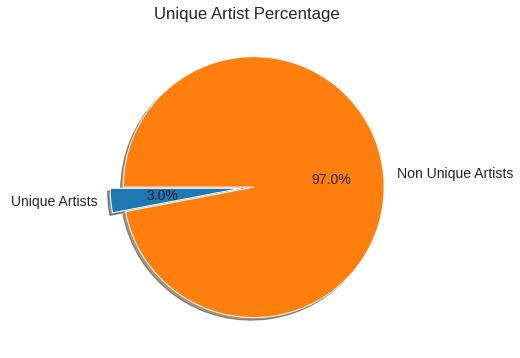

In [28]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage");

1. The unique artist percentage comes around `3%`.
2. We can also confirm this through the `pie chart` we made.

We made the pie chart from `matplotlib` module, we also gave several attributes inside the `pie` function like the `data` `labels`, `start angle`, `shadow`, `explode` and more. 

* For more info (`pie chart`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html 



`fig, ax = plt.subplots(figsize=(8,8))`



### 3.1.2 We can also check the top 10 unique artist we have.

In [29]:
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(15)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
blackbear,11.095,665.550,482
The Chainsmokers,10.817,649.677,620
Billie Eilish,8.444,506.634,484
Jeremy Zucker,7.449,447.228,457
Post Malone,7.206,433.388,427
Eminem,6.866,412.916,450
Juice WRLD,6.631,398.400,424
Maroon 5,6.429,386.631,297
Reol,6.400,385.098,586


We used`groupby` function to make categorical groups of similar artists and then with `sum` we summed up all the counts. Then we sorted the values by the `sort_values` function and arragnged it in descending order.

We also sorted few columns to show, they are `"Listening Time(Hours)","Listening Time(Minutes)","Count"`.

**Note: Here we can see that the Top 10 Artist list varies in two ways:**
> 1. In terms of number of counts i.e. number of times songs played
> 2. In terms of number of hours i.e. number of hours songs played

**Now we'll try to explore them individually**


* For more info (`groupby`) : https://pandas.pydata.org/docs/reference/groupby.html 
* For more info (`sum`) : https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.sum.html 
* For more info (`sort_values`) : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html 

### 3.1.3 Top 10 Unique Artist (hours) : Based on number of hours 

In [30]:
top_10_artist_time_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
blackbear,11.095,665.550,482
The Chainsmokers,10.817,649.677,620
Billie Eilish,8.444,506.634,484
Jeremy Zucker,7.449,447.228,457
Post Malone,7.206,433.388,427
Eminem,6.866,412.916,450
Juice WRLD,6.631,398.400,424
Maroon 5,6.429,386.631,297
Reol,6.400,385.098,586


Here we made a list of **Top 10 Unique Artist** with the help of `groupby` function.

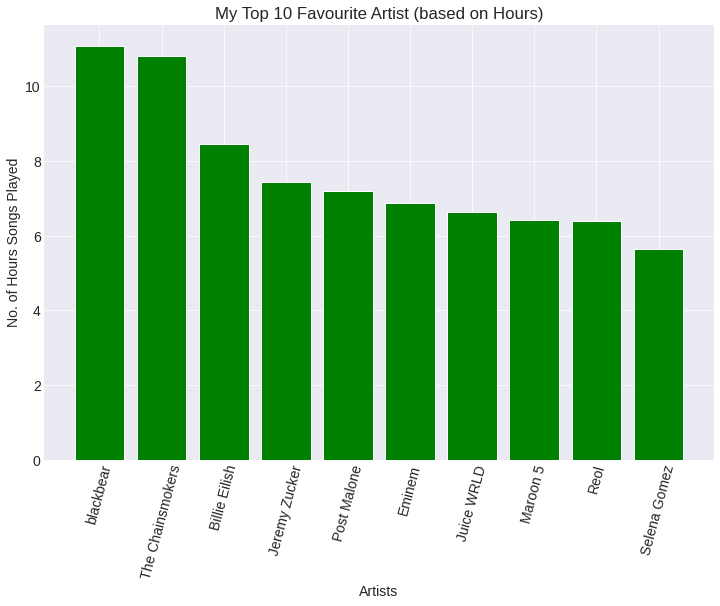

In [31]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

Here we made a `bar` chart to show the same list in a better visualisation. We gave two axis `x & y` as the attributes and `colour` for better visual. We used `set` method to give `title`,`xlable` and `ylabel`.


By This chart we can also see how close these artist are in terms of play time in hours.


* For more info (`bar`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html 
* For more info (`set`) : https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.set.html 

### 3.1.4 Top 10 Unique Artist (count) : Based on the number of count

In [32]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
The Chainsmokers,10.817,649.677,620
Reol,6.400,385.098,586
Billie Eilish,8.444,506.634,484
blackbear,11.095,665.550,482
Jeremy Zucker,7.449,447.228,457
Eminem,6.866,412.916,450
Post Malone,7.206,433.388,427
Juice WRLD,6.631,398.400,424
Taylor Swift,4.992,299.683,374


Here we made a list of **Top 10 Unique Artist** with the help of `groupby` function.

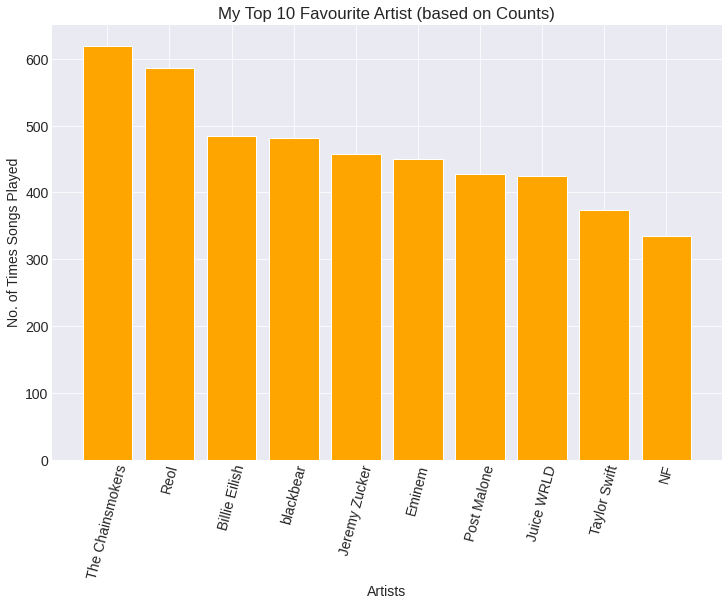

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='orange')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

Here we made a `bar` chart to show the same list in a better visualisation. By this chart we can also see how close these artist are in terms of play time in counts.


 * For more info (`xticks`): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

### 3.1.5 Top 10 Unique Artist (hours) & Top 10 Unique Artist (Count)

Both graphs are plotted side by side along with their average mean for better comparision.

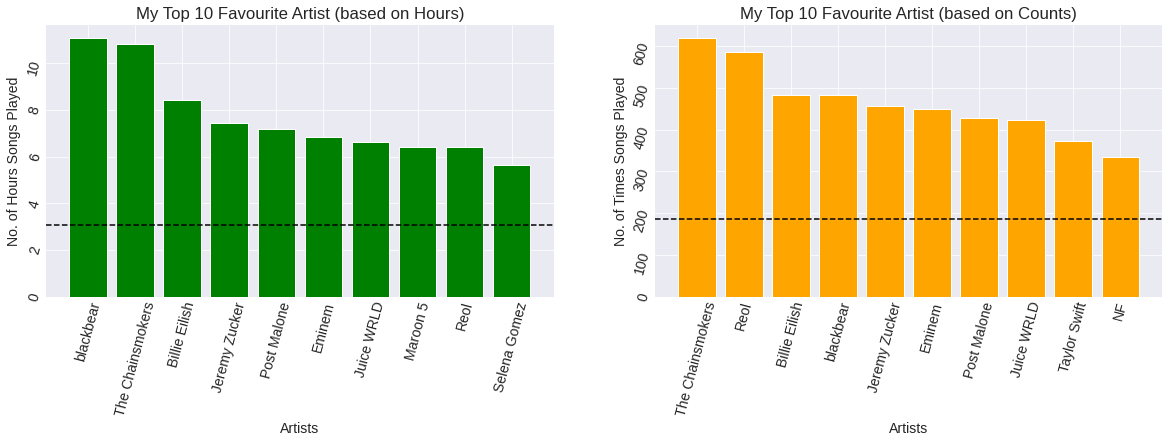

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

# Setting up our seecond graph
ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

Here we made two `bar` charts side by side to show the changes in `Top 10 Unique Artist`. By this comprehensive chart we can see that the list varies as per `number or hours` and `number of counts`.

Here we can see the `Object Oriented API` way of plotting, as we plotted two `subplots` together by refering them as a unique objects. We also added an additional horizontal line with `axhline` function. This line represent the `mean` value of the top 100 artirst in both graphs.


* For more info (`axhline`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html 
* For more info (`subplots`) : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html 

### 3.2 Song Tracks (Exploration)

1. We can check what is the percentage of unique artist we have.
2. We can also check the top 10 unique songs we have.

### 3.2.1 We can check what is the percentage of unique songs we have

In [35]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

6.271157546089964

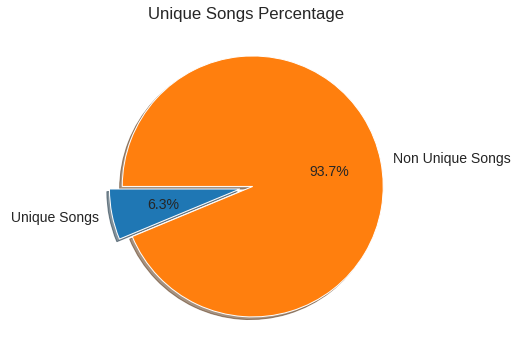

In [36]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

1. The unique songs percentage comes around `6.3 %`.
2. We can also confirm this through the `pie chart` we made.

### 3.2.2 We can also check the top 10 unique songs we have

* We already know that there can be variation as per the number of hours and number of counts.
* So we'll directly plot those two graphs together side by side to confirm it.

In [37]:
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

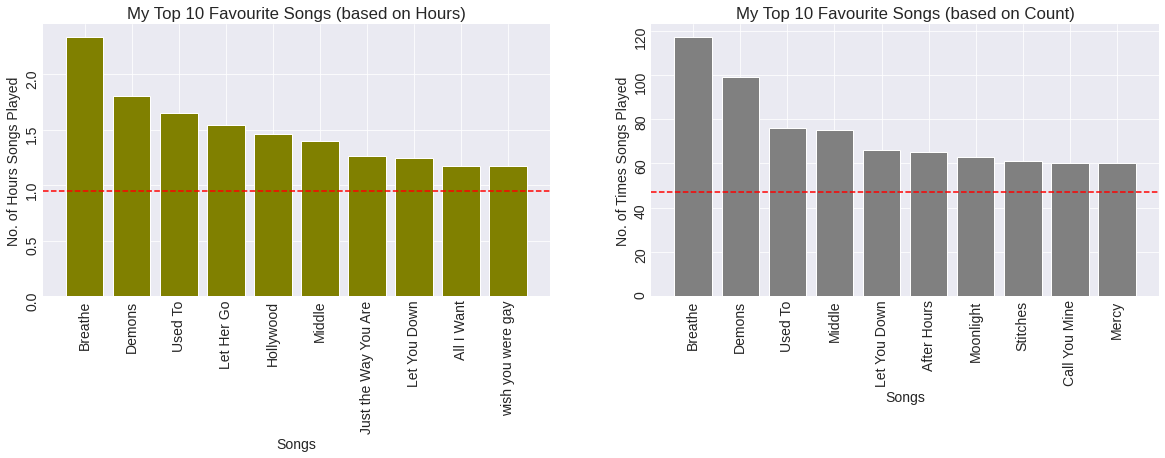

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="olive")
ax1.set(title="My Top 10 Favourite Songs (based on Hours)",xlabel="Songs",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# Setting up our second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Favourite Songs (based on Count)",xlabel="Songs",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

As we alredy know that there can be difference between the charts when we use `number of hours` and `number of counts`. So here we directly made two `bar` charts side by side to show the changes in `Top 10 Unique Artist`.

By this comprehensive chart we can see that the list varies as per `number or hours` and `number of counts`.

### 3.3 Day Wise Usage (Exploration)

Here we'll try to analyse whats is the percentage usage of Spotify Streaming over a Week.

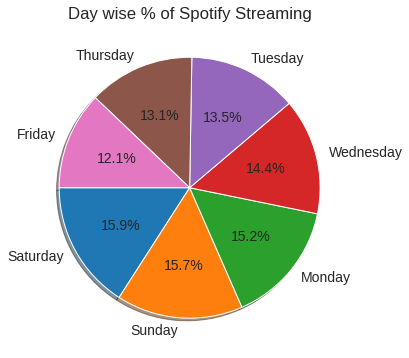

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(spotify_stream_df["day-name"].value_counts(), labels=spotify_stream_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="Day wise % of Spotify Streaming");

This pie charts shows that generally I streamed my Spotify more of Saturdays

### 3.4 Average Usage over a day (Exploration)

* Here we'll try to analyse how my spotify streaming varies over a day.
* At what time I use my spotify more regularly then others

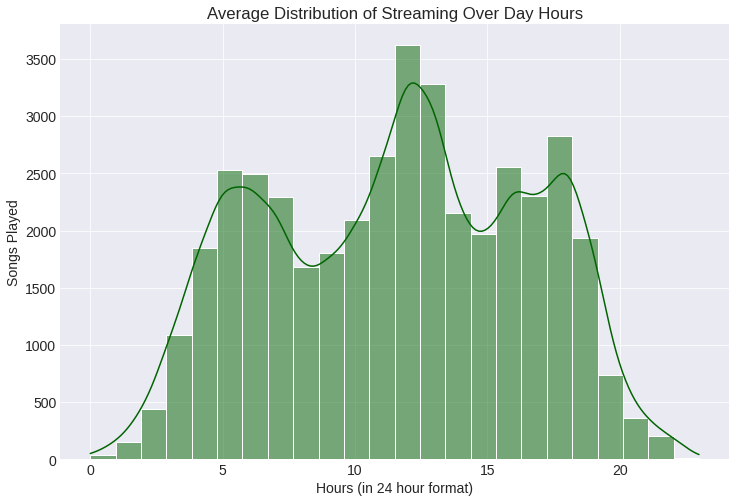

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

With this histogram graph we can see about my average usage:

1. Maximum around `12-1 PM` hour mark
2. Minimum around `12-1 AM` hour mark

We used `seaborn` based `histplot` module to make a histogram. `Seaborn` is based on `Matplotlib` Library only, but it offers better visualisation options.

* For more info (`histplot`) : https://seaborn.pydata.org/generated/seaborn.histplot.html 

### 3.5 Average Usage In a Year (Exploration)

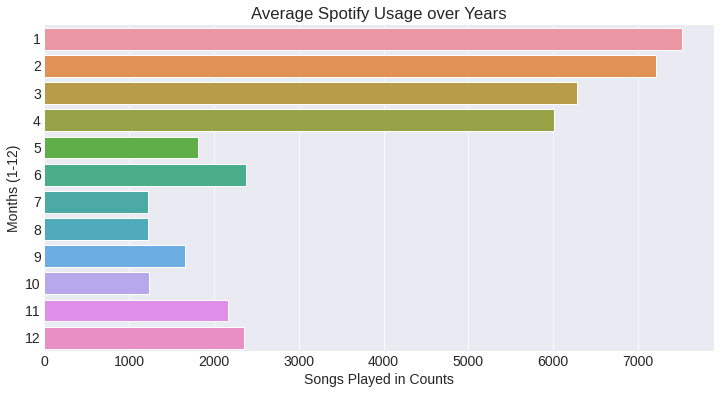

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

We plotted this `countplot` which comes with `seaborn` module to show my usage of `Spotify` over years.
* For more info (`countplot`) : https://seaborn.pydata.org/generated/seaborn.countplot.html 

###  How many hours did I spent on Spotify Streaming since the day I signed up for it

Here we want to know, how many hours I spend while streaming spotify since start.

In [42]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() # Summation of all 
time_spent_hours

636.903

For this we can simply do a summation of all the time I spent on listening to all songs.
* This comes out to be around **637 Hours**.

###  What is actual usage in percentage compared to to the total possible

Here we want to know, what is the percentage of time I spend on spotify.

This question might seem bit odd, but here we want to know that out of maximum possible hours since the start, how much time I actually spent streaming `Spotify` and we want to calculate that in percentage.

In [43]:
date_df = spotify_stream_df["Play-Time"] # Making a new dataset of time only

In [44]:
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D") # Calulating total possible days in days
time_difference_hours = time_difference*24 # Converting that in hours by multiplying with 24
time_difference_hours

4334.266666666666

Here in this calculation:

1. First we subtracted the time, from the start time (when I logged-in to use my spotify for the first time) to the end time (The last time I used `Spotify` as per the dataset.
2. Then we divided that with `np.timedelta64` function to convert and calculate the time into days.
3. We again multiplied it with 24 to convert it into hours.

This comes out to be around **4334.3 Hours**. 

**Note: I was confused about how to subtract the time with datetime type and convert it into days/hours, so I took help from <a href="https://bramtunggala.medium.com/a-simple-way-to-finding-the-difference-between-two-dates-in-pandas-179d2714b6c"> here </a>.**

* For more info (`np.timedelta`) : https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html

In [45]:
time_spent_percentage = time_spent_hours/time_difference_hours*100
time_spent_percentage

14.694596548435722

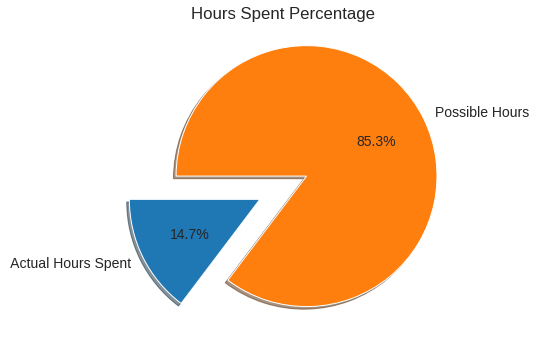

In [46]:
hours_spent_list = np.array([time_spent_hours, time_difference_hours-time_spent_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%',  explode=[0.2,0.2], startangle=180, shadow = True);
plt.title("Hours Spent Percentage");

###  What is the average numbers of songs I played daily 

In [47]:
total_songs = spotify_stream_df["trackName"].count() # Total Songs played

In [48]:
time_difference # Total days when I used Spotify

180.59444444444443

In [49]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

227.0

Here we can see that on an average I played **227** songs per day

#Some More Observations

###  On which day I played maximum number of songs via scatterplot

In [50]:
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date # Creating a new column with date

Here I created another column called `date` which has the date that we calculated from the original `Play-Time` column.

In [51]:
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2021-01-31,855


Here we can see that I played most songs which is `855 Songs` on `1st Jan 2021`

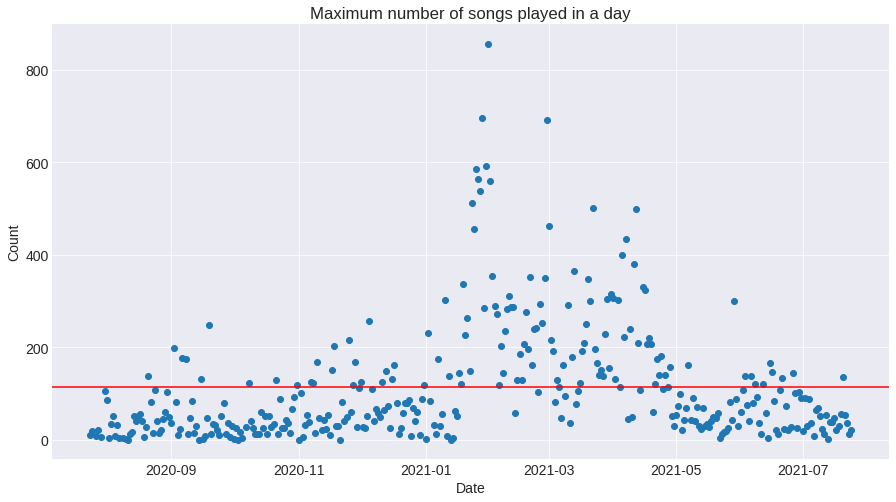

In [52]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

###   My favourite 100 Artist in word could


In [53]:
fav_artist = spotify_stream_df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
The Chainsmokers    620
Reol                586
Billie Eilish       484
blackbear           482
Jeremy Zucker       457
                   ... 
Josh A               92
Bangers Only         91
CNCO                 91
Moe Shop             89
Ritviz               88
Name: Count, Length: 100, dtype: int64

Here again we made categorical group with `groupby` function and take a count of it. We also sorted the values with `sort_values` function and picked on `Top 100 Artists`.

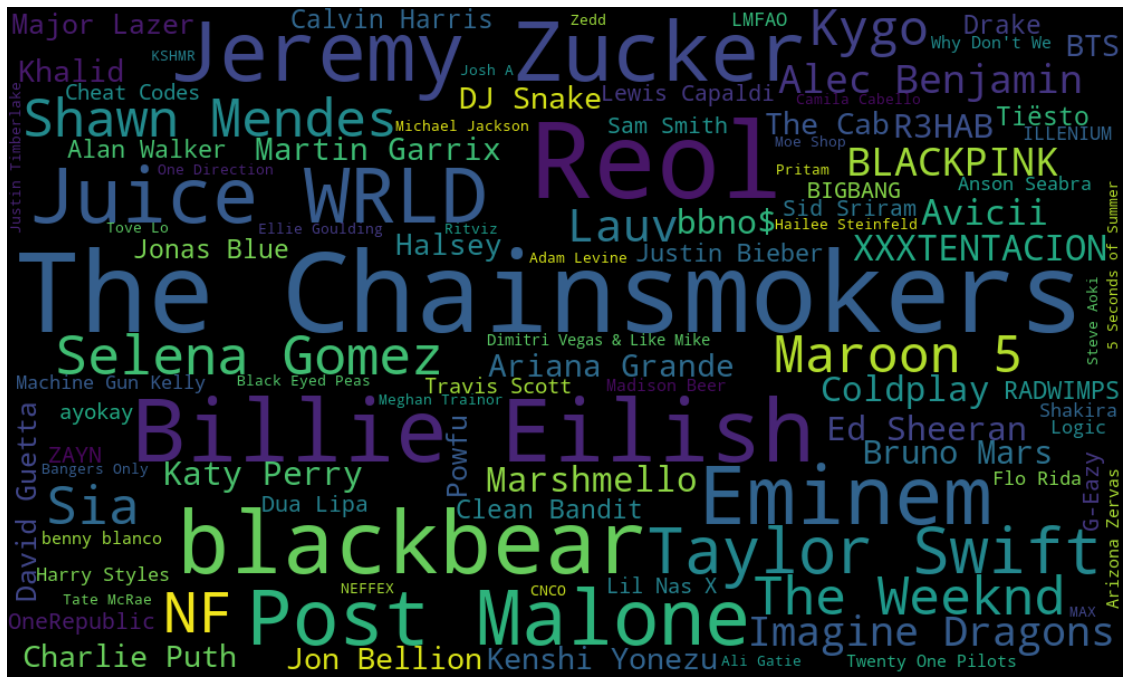

In [54]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

Here we used the `WordCloud` function from `wordcloud` module which allows us to make a word cloud of the given list or series. 
We can addtionally give other attributes like:
1. `max_words` to fix the number of words to display
2. `width` and `heigh` for the size.
3. `normalize_plurals` for removing additional `'s` from the words and more

We also used the `generate_from_frequencies` function to generate the counted words with the given frequencies in the dataframe.

* For more info (`wordcloud`) : https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

###  My Favourite Artist playlist based on his daily usage.

In [55]:
my_fav_artist_playlist = spotify_stream_df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)

In [56]:
my_fav_artist_playlist

,,Count
artistName,trackName,
DJ Snake,Middle,75
Shawn Mendes,Stitches,61
The Chainsmokers,Call You Mine,60
Major Lazer,Lean On,60
Imagine Dragons,Demons,56
...,...,...
Jxve,Bandaids,36
Lauv,Modern Loneliness,36
Maroon 5,Girls Like You (feat. Cardi B),36


Like before, here we simple made a dataframe with our favourite artists and their songs. This was made the help of `groupby` function but this time we gave two columns to do the categorical grouping of the data. Then collectively we made a list based on the counts.

### My Favourite 100 Songs In Word Cloud.

To see what are top 100 songs that I usually listen to.

In [57]:
fav_songs = spotify_stream_df.groupby(["trackName"])["Count"].count()

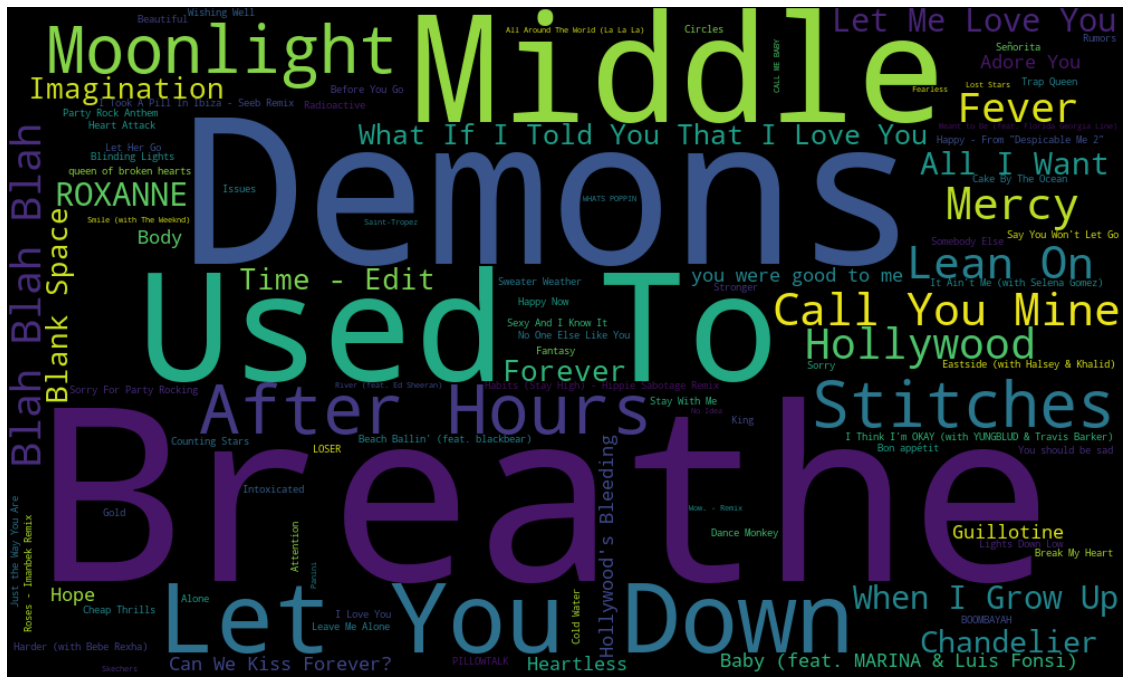

In [58]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

###  Most Usage ( Active usage in a day over a week) via a heatmap.

We willsee the detail usage of my Spotify Streaming.
1. My usage based on the daily hours.
2. My usage based on the daily days over week.
The heatmap would show at what time of what day I usually listen more songs.

In [59]:
active_usage = spotify_stream_df.groupby(['hours', 'day-name'])['artistName'].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'day-name', 'artistName')
active_usage_pivot.head()

day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,NaN,NaN,5.0,NaN,NaN,19.0,16.0
1,1.0,2.0,37.0,86.0,14.0,11.0,3.0
2,55.0,NaN,120.0,75.0,55.0,23.0,112.0
3,132.0,113.0,143.0,122.0,208.0,129.0,242.0
4,194.0,234.0,283.0,267.0,291.0,305.0,271.0


Here first we made a new dataframe with `groupby` like before but then we made a pivoted table with the help of `pivot` function. This gave us a comprehensive chart with `days of the week` and `time of day` and number of songs I played in that particular time/day.

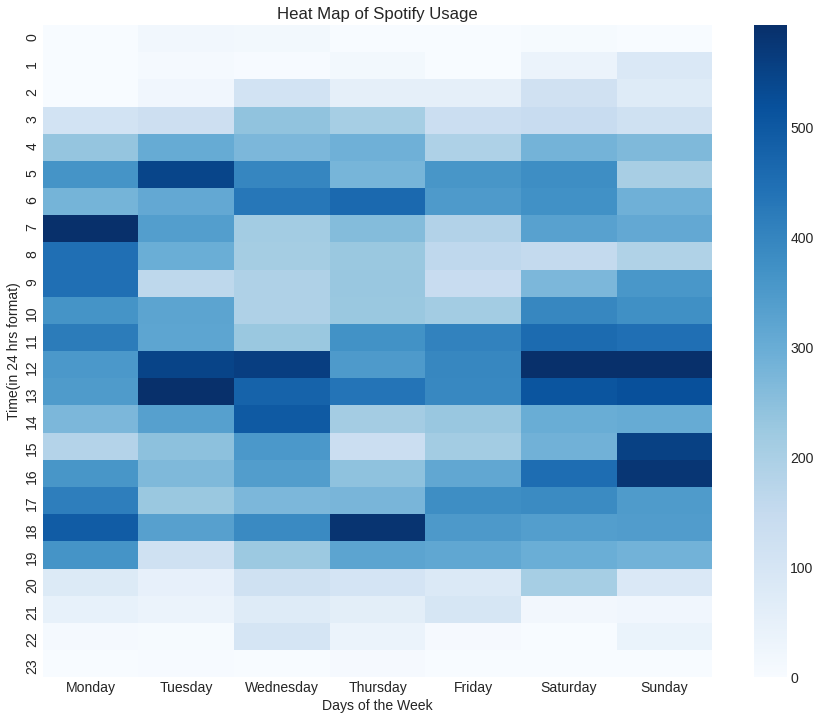

In [60]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

We plotted the newly constructed dataframe with the help of `heatmap` plot of `seaborn`. 

The `heatmap` plot takes certain arrtibutes like the:
1. `x-axis` for the x-axis and its lables
2. `fillna` along with the table to fill the empltu slots as 0
3. `cmap` for the color of the heatmap chart and more

**We can see that, I'm more active in Spotify on Fridays and between 8AM to 7PM.**

* For more info (`heatmap`) : https://seaborn.pydata.org/generated/seaborn.heatmap.html 

##### **Future Work** : While analysing this heatmap, we can look for the patterns of usage for the user. This will help us to  help to check when can get additional load is usage, what time is more preferred by user and silimar for all. This can help us in better placemnets of different advertisements.

###  Usage Analysis over a week via countplot


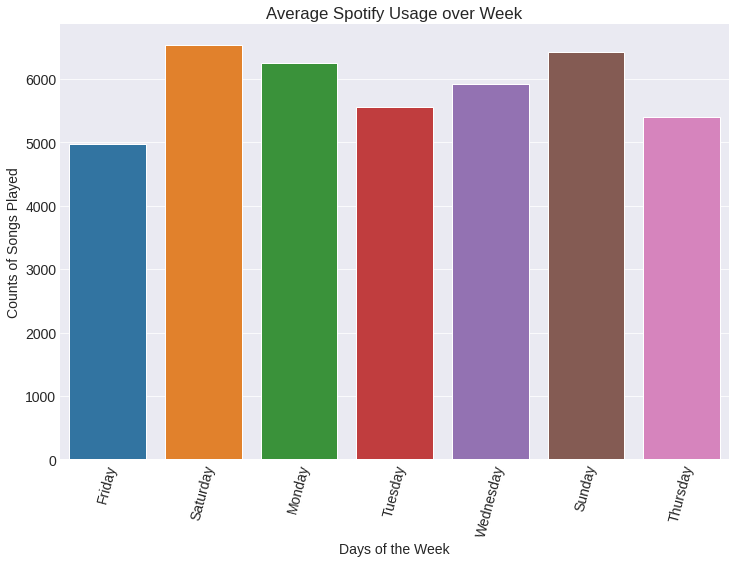

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

With this `barplot` we can clearly say that I'm much more active on `Saturdays` over other days of the week.

###  What is the percentage of usage distribution between Weekday and Weekend 

Here we want to checkthe percentage of songs are played on Weekdays and Weekends. Also what is the average playtime per day in weekend and weekdays.

In [62]:
extra_df = spotify_stream_df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,28100
True,12961


In [63]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,28100,68.434768
True,12961,31.565232


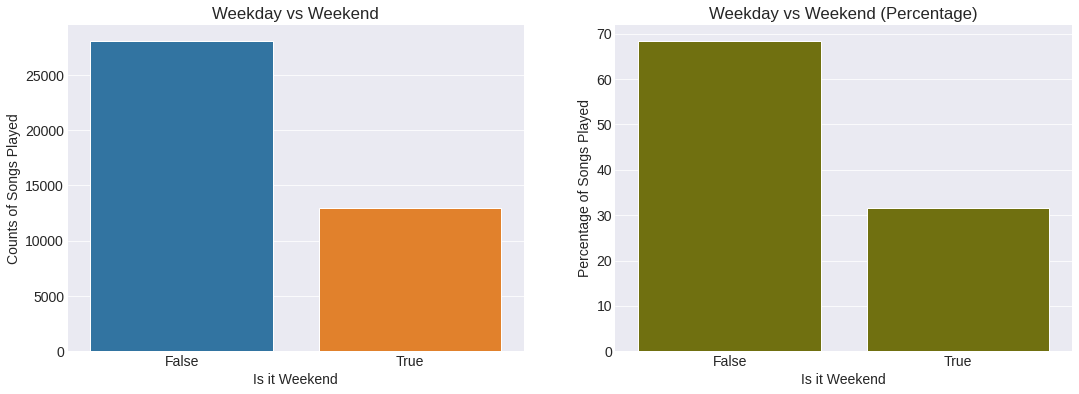

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

## 5 Inferences and Conclusions

We've got many useful insights from this dataset. Here's a few of them:

- I have played songs of `1232 Unique Artist` which comprises `3%` of total artist in my streaming history.

- I have played `2575 Unique Songs` which comprises `6.3%` of total songs in my streaming history.  

- Of all the days, I'm most active in `Spotify` on `Saturdays`.

- My most active hours ranges from `5 AM` to `7 PM`. Maximum around `12PM-1PM` hour period and Minimum at`12AM-1AM` hour period.

- I played `227 songs` on average per day.

- On `1st JAN 2021` I played `855 Songs` which is my personal maximum.

- Since the day I created my Spotify Account, I played the most songs in `Jan 2021`.

- I have spent almost `637 hours` streaming on spotify till now. That's about `14.7%` of the possible `4334.3 hours`

- My favourite artist whom I've played most is `Blackbear`. While my favourite song is `Breathe`.


## 6 References

Check out the following resources to learn more about the dataset and tools used in this notebook:

**Dataset :**

- Spotify Help : https://support.spotify.com/us/article/data-rights-and-privacy-settings/
- Spotify Help : https://www.spotify.com/us/privacy

**Tools Used :**

- Jovian Course : https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas 
- Jupyter Notbook Guide : https://jupyter-notebook.readthedocs.io/en/stable/
- Python User Guide & Tutorial : https://docs.python.org/3/tutorial/ 
- Numpy User Guide: https://numpy.org/doc/stable/user/quickstart.html 
- Pandas User Guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib User Guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn User Guide & Tutorial: https://seaborn.pydata.org/tutorial.html
- Word Cloud User Guide & Tutorial : https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [68]:
import jovian
jovian.commit(outputs=["spotify_data.csv","StreamingHistory0.json","StreamingHistory1.json","StreamingHistory2.json","StreamingHistory3.json","StreamingHistory4.json"])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/shikiz/spotify-eda-project


'https://jovian.ai/shikiz/spotify-eda-project'